## Polynomial Regression: With and Without Regularization

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

### Random data generator
#### best_data_so_far: my choice as it is best generated data so far
#### best_real_data: as close as possible real data - students' pulses before (x) and after (y) being asked a certain question

In [2]:
def create_random_data():
    N = 10
    a, b = 1, 0.5
    xdata = np.random.uniform(0, 1, size=N)
    ydata = a * xdata + b + np.random.normal(0, 0.1, size=N)
    minxdata, maxxdata, minydata, maxydata= min(xdata), max(xdata), min(ydata), max(ydata)
    for index in range(N):
        xdata[index] = (((xdata[index] - minxdata) * (0.91 - 0.58)) / (maxxdata - minxdata)) + 0.58
        ydata[index] = (((ydata[index] - minydata) * (0.85 - 0.51)) / (maxydata - minydata)) + 0.51
    return {'x':np.array([[x] for x in xdata]), 'y':np.array([[y] for y in ydata])}

best_data_so_far = {'x': np.array([[0.75659034],
       [0.89209215],
       [0.62099198],
       [0.62794942],
       [0.58      ],
       [0.91      ],
       [0.58221559],
       [0.76560186],
       [0.86236896],
       [0.72769627]]), 'y': np.array([[0.69275913],
       [0.74920718],
       [0.56715365],
       [0.55729929],
       [0.52467625],
       [0.77512932],
       [0.51      ],
       [0.72744661],
       [0.85      ],
       [0.63524918]])}
best_real_data = {'x': np.array([[0.7       ],
       [0.9072727272727271],
       [0.6663636363636364],
       [0.8154545454545454],
       [0.9072727272727271],
       [0.6831818181818181],
       [0.6754545454545455],
       [0.6909090909090909],
       [0.7827272727272726],
       [0.5836363636363636]]), 'y': np.array([[0.6612209802235598],
       [0.7850386930352536],
       [0.5511607910576096],
       [0.7067927773000859],
       [0.8503869303525365],
       [0.5124677558039553],
       [0.6354256233877902],
       [0.5829750644883921],
       [0.6552020636285468],
       [0.5124677558039553]])}

### Calculating real data (real students' pulses)

In [3]:
def get_pulses():
    pulses = {'x': [[133],[315],[335],[352],[369],[389],[571],[643],[845],[845]],
            'y': [[602],[557],[459],[602],[520],[429],[436],[376],[285],[209]]}
    for y in pulses['y']:
        y[0] = (1198 - y[0]) / 1163
    for x in pulses['x']:
        x[0] = (1151 + x[0]) * 0.7 / (1151 + 389)
    pulses['x'] = np.array(pulses['x'])
    pulses['y'] = np.array(pulses['y'])
    return pulses

### Computing Methods

In [4]:
import numpy as np
import math


def calculate_Qa(data_x, data_y, M):
    X = design_matrix(data_x, M).transpose()
    Y = data_y.transpose()
    a, _ = least_squares(data_x, data_y, M)
    return ((Y - a.transpose() @ X) @ (Y - a.transpose() @ X).transpose())[0][0]


def calculate_Qa_regularization(data_x, data_y, M, lambdaa):
    X = design_matrix(data_x, M).transpose()
    Y = data_y.transpose()
    a, _ = regularized_least_squares(data_x, data_y, M, lambdaa)
    return ((Y - a.transpose() @ X) @ (Y - a.transpose() @ X).transpose() + lambdaa * (a.transpose()@a))[0][0]


def euklidian_domain(a):
    return round(math.sqrt(np.sum(a ** 2)), 2)


def polynomial(x, a):
    return np.sum([a[i] * x ** i for i in range(np.shape(a)[0])], axis=0)


def mean_squared_error(x, y, a):
    return 1 / len(x) * np.sum((y - polynomial(x, a)) ** 2)


def design_matrix(x_data, M):
    return np.array([x_data ** i for i in range(M + 1)]).transpose()[0]


def least_squares(x_data, y_data, M):
    dm = design_matrix(x_data, M)
    dmt = dm.transpose()
    a = np.linalg.inv(dmt @ dm) @ dmt @ y_data
    return a, mean_squared_error(x_data, y_data, a)

def regularized_least_squares(x_data, y_data, M, regularization_lambda):
    dm = design_matrix(x_data, M)
    dmt = dm.transpose()
    li = np.eye(M + 1) * regularization_lambda
    a = np.linalg.inv(dmt @ dm + li) @ dmt @ y_data
    return a, mean_squared_error(x_data, y_data, a)

### Plots settings

In [5]:
def set_plot(data,i):
    sub = fig.add_subplot(3, 2, i + 1)
    plt.xlabel("pulse before", fontsize=10)
    plt.ylabel("pulse after", fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    sub.set_xlim(0.99*min(data['x']), 1.01*max(data['x']))
    sub.set_ylim(0.99*min(data['y']), 1.01*max(data['y']))
    sub.set_xticks(np.arange(0.6, 0.95, 0.05))
    sub.set_yticks(np.arange(0.5, 1, 0.1))
    return sub

### Drawing Plots Without Regularization

In [6]:
def create_100_plots_without(data, i, sub):
    xs = data['x'].tolist()
    ys = data['y'].tolist()
    for comb in combinations('0123456789', 8):
        data_xs = np.array([xs[int(ii)] for ii in comb])
        data_ys = np.array([ys[int(ii)] for ii in comb])        
        x_plot = np.arange(min(data['x']), max(data['x']), 0.001)
        try:
            a, _ = least_squares(data_xs, data_ys, i+1)
            y_plot = polynomial(x_plot, a)
            sub.plot(x_plot, y_plot, 'orange', linewidth=1)
        except:
            pass
        
def create_plots_no_regularization(data,i):
    sub = set_plot(data,i)    
    x_plot = np.arange(min(data['x']), max(data['x']), 0.001)
    a, _ = least_squares(data['x'], data['y'], i+1)
    y_plot = polynomial(x_plot, a)
    sub.set_title("Number Of Parameters = {}\nEuklidian Domain = {}\nQ(a) = {}"
                  .format(i + 2, euklidian_domain(a), calculate_Qa(data['x'], data['y'], i + 1)), fontsize=12)
    create_100_plots_without(data, i, sub)
    sub.plot(data['x'], data['y'], 'o', markeredgecolor='blue', markersize=3, markeredgewidth=3)
    sub.plot(x_plot, y_plot, 'black', linewidth=2)

### Drawing Plots With Regularization

In [7]:
def find_best_a_parameters(x_data,y_data, i):
    lambdas = [0.00000000000000000000000000001,0.00000000000000000000000000005,0.00000000000000000000001,0.00000000000000000000005,
               0.000000000000000000000000001,0.000000000000000000000000005,0.0000000000000000000001,0.0000000000000000000005,
               0.0000000000000000000000001,0.0000000000000000000000005,0.000000000000000000001,0.000000000000000000005,
               0.00000000000000000000001,0.00000000000000000000005,0.00000000000000000001,0.00000000000000000005,
               0.000000000000000000001,0.000000000000000000005,0.0000000000000000001,0.0000000000000000005,
               0.0000000000000000001,0.0000000000000000005,0.000000000000000001,0.000000000000000005,
               0.00000000000000001,0.00000000000000005,0.0000000000000001,0.0000000000000005,
               0.000000000000001,0.000000000000005,0.00000000000001,0.00000000000005,
               0.0000000000001,0.0000000000005,0.000000000001,0.000000000005,
               0.00000000001,0.00000000005,0.0000000001,0.0000000005,
               0.000000001,0.000000005, 0.00000001,0.00000005]
    
    a_list = list()
    err_list = list()
    for lmbd in lambdas:
        a, err = regularized_least_squares(x_data, y_data, i+1, lmbd)
        a_list.append(a)
        err_list.append(err)
    index = err_list.index(min(err_list))
    return a_list[index], lambdas[index]

def create_100_plots_with(data, i, sub):
    xs = data['x'].tolist()
    ys = data['y'].tolist()
    for comb in combinations('0123456789', 8):
        data_xs = np.array([xs[int(ii)] for ii in comb])
        data_ys = np.array([ys[int(ii)] for ii in comb])        
        x_plot = np.arange(min(data['x']), max(data['x']), 0.001)       
        try:
            a, _ = find_best_a_parameters(data_xs, data_ys, i)
            y_plot = polynomial(x_plot, a)
            sub.plot(x_plot, y_plot, 'orange', linewidth=1)
        except:
            pass
        
def create_regularization_plots(data,i):
    sub = set_plot(data,i)    
    x_plot = np.arange(min(data['x']), max(data['x']), 0.001)
    a, best_lambda = find_best_a_parameters(data['x'], data['y'], i)
    y_plot = polynomial(x_plot, a)
    sub.set_title("Number Of Parameters = {}\nEuklidian Domain = {}\nQ(a) = {}\n$\lambda$ = {}"
                  .format(i + 2, euklidian_domain(a), calculate_Qa_regularization(data['x'], data['y'], i + 1, best_lambda), 
                          best_lambda), fontsize=12)
    create_100_plots_with(data, i, sub)
    sub.plot(data['x'], data['y'], 'o', markeredgecolor='blue', markersize=3, markeredgewidth=3)
    sub.plot(x_plot, y_plot, 'black', linewidth=2)

# Radnom Data Without Regularization

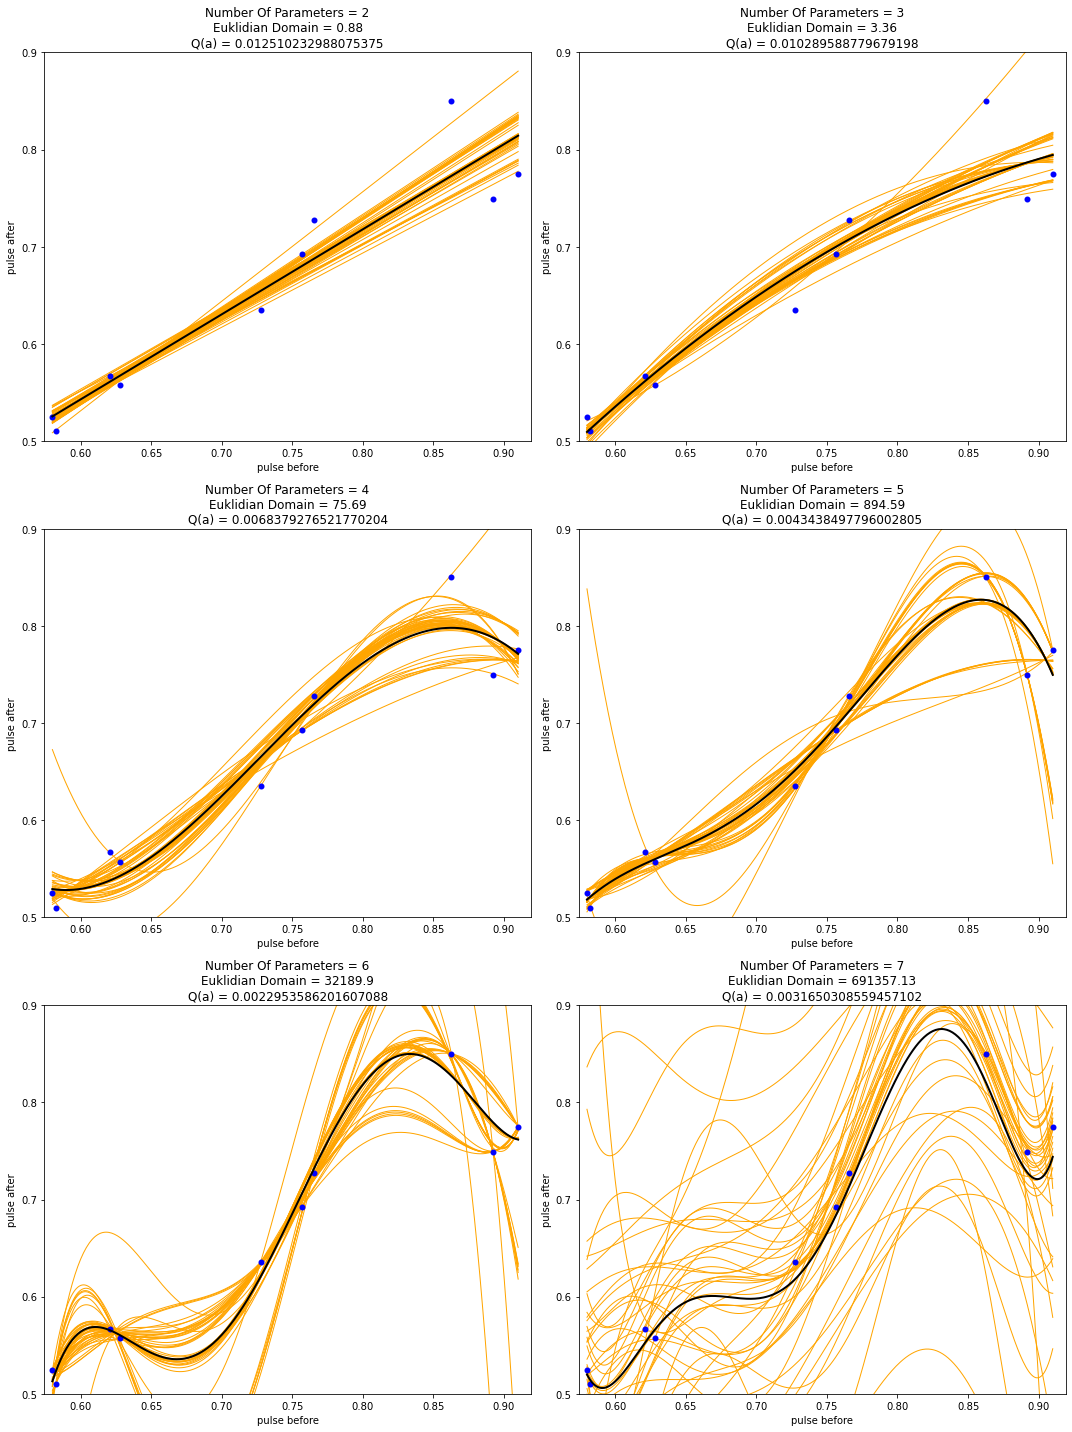

In [8]:
fig = plt.figure(figsize=(15, 20))
for i in range(0, 6):
    create_plots_no_regularization(best_data_so_far, i)
plt.tight_layout()
plt.draw()

# Random Data With Regularization

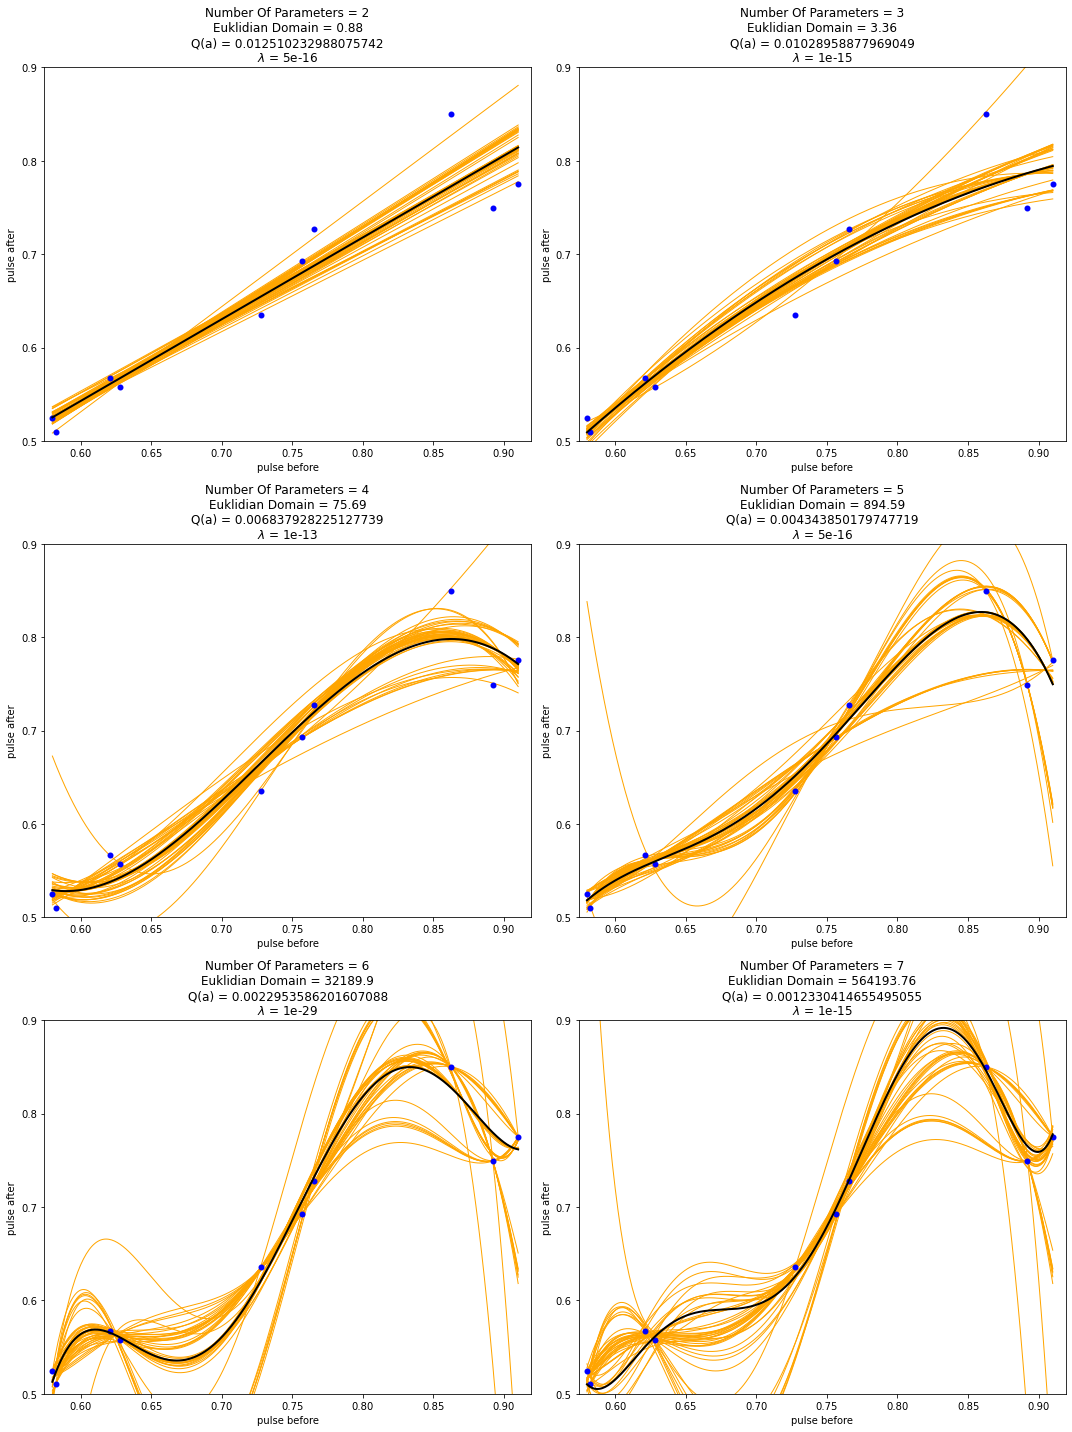

In [9]:
fig = plt.figure(figsize=(15, 20))
for i in range(0, 6):
    create_regularization_plots(best_data_so_far, i)
plt.tight_layout()
plt.draw()

# Real Data Without Regularization

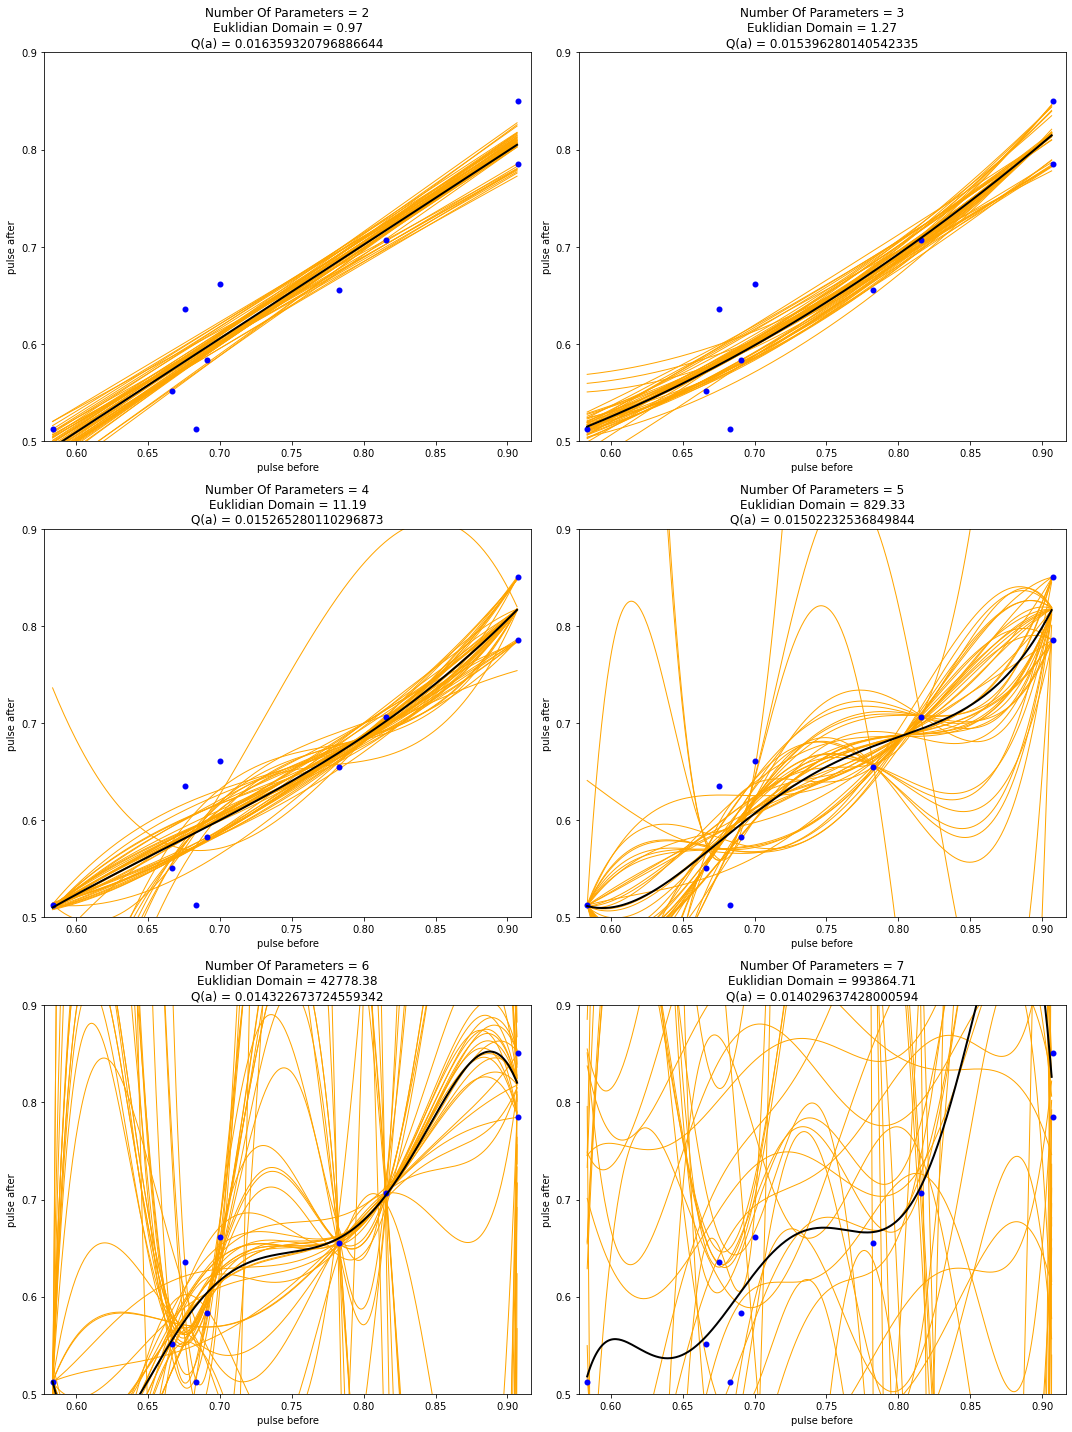

In [10]:
fig = plt.figure(figsize=(15, 20))
for i in range(0, 6):
    create_plots_no_regularization(best_real_data, i)
plt.tight_layout()
plt.draw()

# Real Data With Regularization

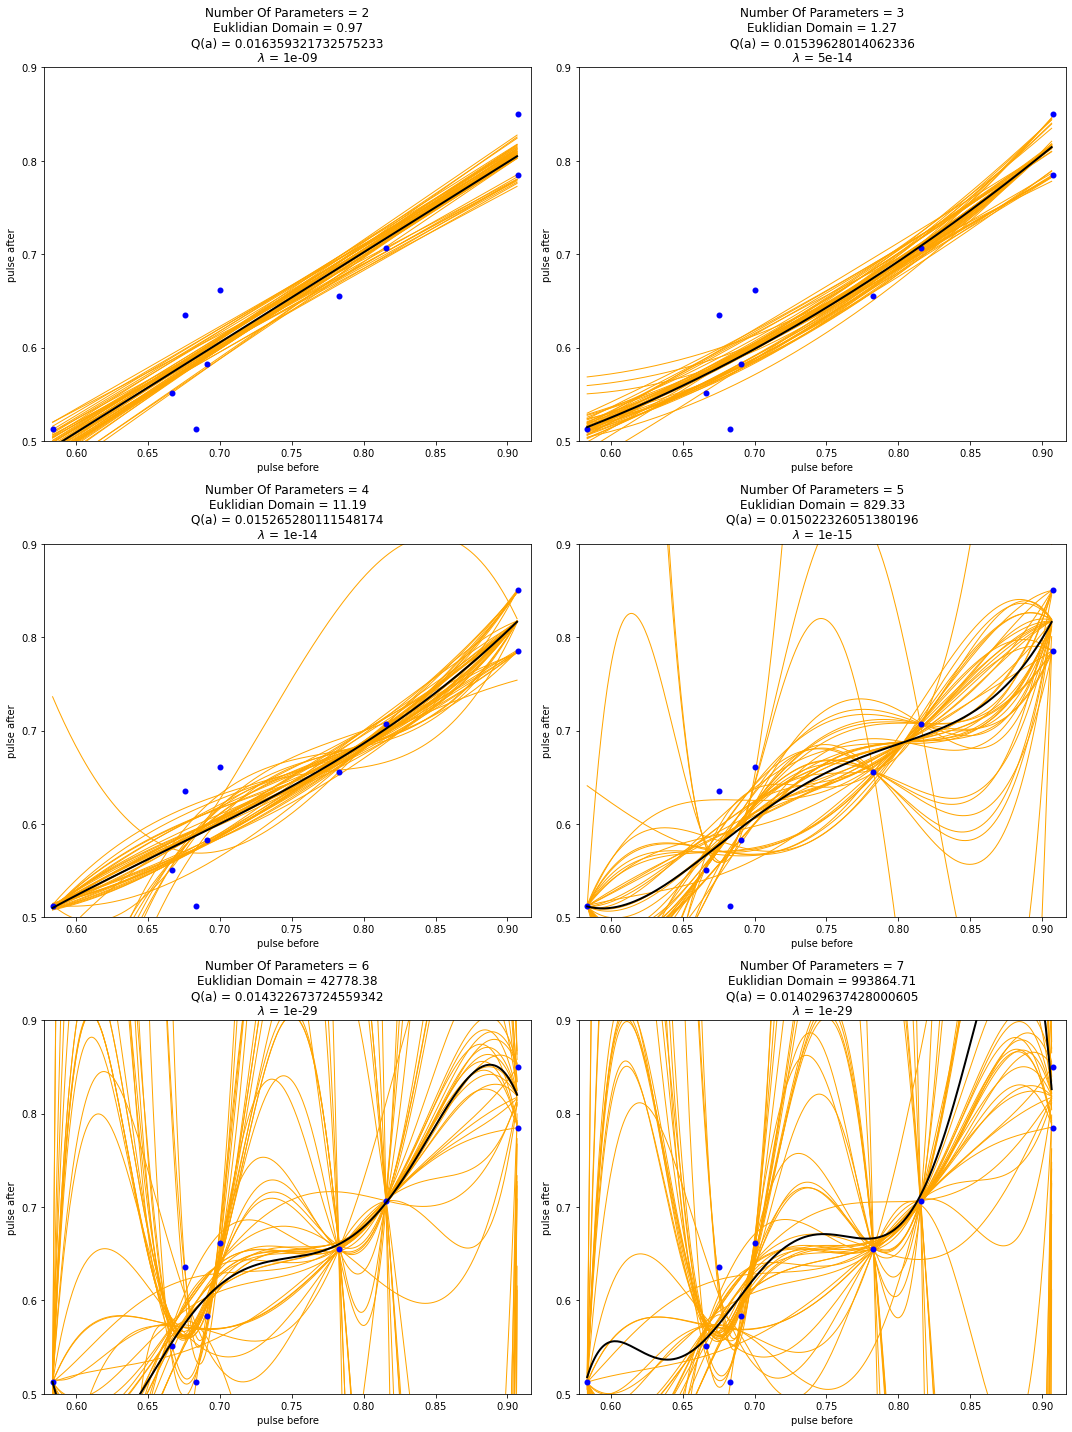

In [11]:
fig = plt.figure(figsize=(15, 20))
for i in range(0, 6):
    create_regularization_plots(best_real_data, i)
plt.tight_layout()
plt.draw()